In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
img =Image.open('task2.jpg')

In [3]:
img.size

(1275, 1275)

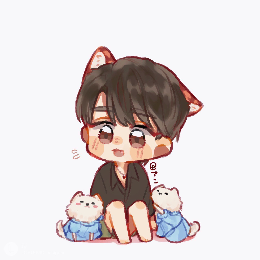

In [4]:
img.resize([260,260])

In [5]:
Im=np.array(img)
Im=Im/255

# 单色图片

<Figure size 432x288 with 0 Axes>

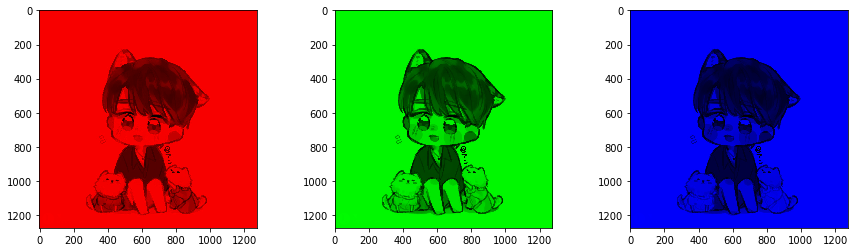

In [6]:
Im0=1.0*Im;Im0[:,:,1]=0;Im0[:,:,2]=0
Im1=1.0*Im;Im1[:,:,0]=0;Im1[:,:,2]=0
Im2=1.0*Im;Im2[:,:,0]=0;Im2[:,:,1]=0
plt.figure()
fig,ax=plt.subplots(1,3)
fig.set_figwidth(15)

ax[0].imshow(Im0)
ax[1].imshow(Im1)
ax[2].imshow(Im2)




# 代数运算 

<Figure size 432x288 with 0 Axes>

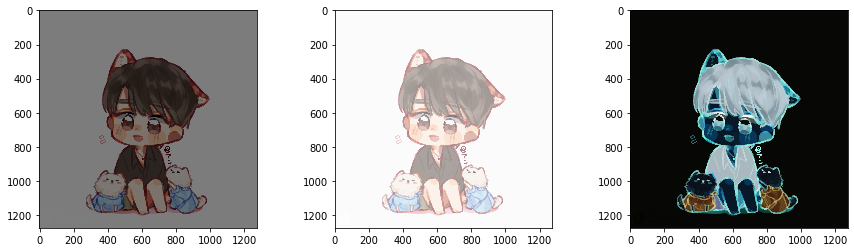

In [7]:
Im0=0.5*Im
Im1=0.5*Im+0.5
Im2=1-Im
plt.figure()
fig,ax=plt.subplots(1,3)
fig.set_figwidth(15)
ax[0].imshow(Im0)
ax[1].imshow(Im1)
ax[2].imshow(Im2)



# Something Different

In [8]:
Mars = Image.open("mars1.png")
Mars.size

(2048, 2048)

In [9]:
Mars = Mars.resize([260,260])


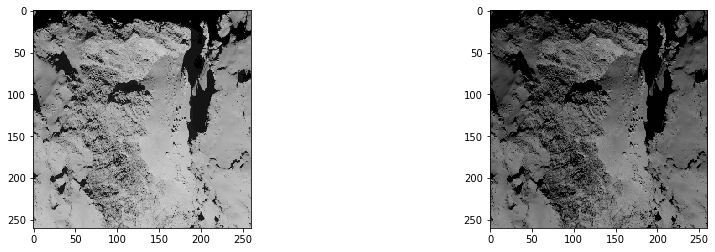

In [10]:
Mars_in = Mars.point(lambda i: 255*((float(i)/255)**(1/2.2)))

fig,ax=plt.subplots(1,2)
fig.set_figwidth(15)

ax[0].imshow(Mars_in)
ax[1].imshow(Mars)




# 图片叠加


# Hybird Image


- Gaussian Filter
- High/Low Pass
- Fourier Transform

In [11]:
Ein = Image.open("Ein.png").convert("L")  
Ein = Ein.resize([248,248])
Ein = np.array(Ein)
Ein = Ein.astype(np.float32) / 255.

Mar = Image.open('Mar.png').convert("L")
Mar = Mar.resize([248,248])
Mar = np.array(Mar)
Mar = Mar.astype(np.float32) / 255.


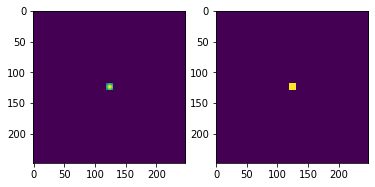

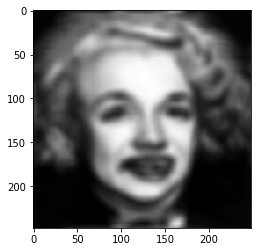

In [12]:
# Create 2D Gaussian Filter
h, w = Ein.shape[:2]
kernel_low = np.zeros((h, w))
kernel_high = np.zeros((h, w))

x, y = np.meshgrid(np.linspace(-1,1,11), np.linspace(-1,1,11))
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0,0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 )))
g /= g.sum()
kernel_low[h//2-5:h//2+6, w//2-5:w//2+6] = g
g_low = 1 - g
g_low /= g_low.sum()
kernel_high[h//2-5:h//2+6, w//2-5:w//2+6] = g_low

plt.subplot(1,2,1)
plt.imshow(kernel_low)
plt.subplot(1,2,2)
plt.imshow(kernel_high)

plt.show()

# Apply FFT2

img_fft = np.fft.fft2(Ein)
kernel_high_fft = np.fft.fft2(kernel_high)
img1_rec = np.fft.fftshift(np.fft.ifft2(img_fft * kernel_high_fft))
img2_fft = np.fft.fft2(Mar)
kernel_low_fft = np.fft.fft2(kernel_low)
img2_rec = np.fft.fftshift(np.fft.ifft2(img2_fft * kernel_low_fft))
plt.imshow(abs(img1_rec) * abs(img2_rec),cmap='gray')
plt.show()